# 0. Purpose of this notebook

 - Examine how `tgan` algorithm works
 
 - References:
     - [テーブルデータ向けのGAN（TGAN）で、titanicのデータを増やす!](https://upura.hatenablog.com/entry/2019/08/20/120000) (in Japanese)
         - Referred this site for executing tgan
     - [Implementation of tgan](https://github.com/DAI-Lab/TGAN)
     
- Environment:
    - Examined this notebook under python3.6 AzureML environment (Data Science VM)

- Major preparation:
    - `pip install tgan` and related packages like tensorflow, imblearn etc.
    - Download titanic dataset from https://www.kaggle.com/c/titanic/data, and put `train.csv` into `./data`, after making the directory.

# 1. Preparation & execution of `tgan`

In [1]:
import os, sys

import numpy as np
import pandas as pd
from scipy.spatial import distance
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score

from imblearn.over_sampling import SMOTE

from tgan.model import TGANModel

import seaborn as sns

Using TensorFlow backend.
W0922 08:48:38.683970 140633002911488 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/tensorpack/callbacks/hooks.py:17: The name tf.train.SessionRunHook is deprecated. Please use tf.estimator.SessionRunHook instead.

W0922 08:48:38.699619 140633002911488 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/tensorpack/tfutils/optimizer.py:18: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0922 08:48:38.701217 140633002911488 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/tensorpack/tfutils/sesscreate.py:20: The name tf.train.SessionCreator is deprecated. Please use tf.compat.v1.train.SessionCreator instead.



# 1.0 Load data

In [2]:
## Used dataset
FILE = 'train.csv'

In [3]:
WKDIR = './data'
os.chdir(WKDIR)

In [4]:
## Data load
df = pd.read_csv(FILE)

In [5]:
df.shape

(891, 12)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1.1 Prepare `tgan`

In [7]:
## check null data:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
## Omit unnecessary or too many NA fields:
df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [9]:
## Fill in:
df['Age'].fillna(round(df['Age'].mean(), 0), inplace=True)
df['Embarked'].fillna(df['Embarked'].value_counts().index[0], inplace=True)

In [10]:
## Save column names, because they're replaced numbers after executing tgan
df_columns = df.columns

In [11]:
## Save columns with continuous values
continuous_columns = [df.columns.get_loc(c) for c in df.select_dtypes(include=['float']).columns]

# 1.2 Model generation of `tgan`

In [12]:
## Instanciation
tgan = TGANModel(continuous_columns, batch_size=50)

In [13]:
## Training of tgan
#tgan.fit(df)

In [14]:
model_name = './model.pkl'
#tgan.save(model_name)

In [15]:
tgan = TGANModel.load(model_name)

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.20.3 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
W0922 08:48:39.702479 140633002911488 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/tensorpack/tfutils/varmanip.py:178: The name tf.gfile.Exists is deprecated. Please use tf.io.gfile.exists instead.

W0922 08:48:39.725731 140633002911488 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/tensorpack/predict/config.py:101: The name tf.train.ChiefSessionCreator is deprecated. Please use tf.compat.v1.train.ChiefSessionCreator instead.

W0922 08:48:39.726867 140633002911488 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/tensorpack/tfutils/common.py:41: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W

[0922 08:48:40 @registry.py:126] gen/LSTM/00/FC input: [50, 100]


W0922 08:48:40.523312 140633002911488 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/tensorpack/models/fc.py:57: The name tf.layers.Dense is deprecated. Please use tf.compat.v1.layers.Dense instead.



[0922 08:48:40 @registry.py:134] gen/LSTM/00/FC output: [50, 100]
[0922 08:48:40 @registry.py:126] gen/LSTM/00/FC2 input: [50, 100]
[0922 08:48:40 @registry.py:134] gen/LSTM/00/FC2 output: [50, 2]
[0922 08:48:40 @registry.py:126] gen/LSTM/00/FC3 input: [50, 2]
[0922 08:48:40 @registry.py:134] gen/LSTM/00/FC3 output: [50, 100]
[0922 08:48:40 @registry.py:126] gen/LSTM/01/FC input: [50, 100]
[0922 08:48:41 @registry.py:134] gen/LSTM/01/FC output: [50, 100]
[0922 08:48:41 @registry.py:126] gen/LSTM/01/FC2 input: [50, 100]
[0922 08:48:41 @registry.py:134] gen/LSTM/01/FC2 output: [50, 3]
[0922 08:48:41 @registry.py:126] gen/LSTM/01/FC3 input: [50, 3]
[0922 08:48:41 @registry.py:134] gen/LSTM/01/FC3 output: [50, 100]
[0922 08:48:41 @registry.py:126] gen/LSTM/02/FC input: [50, 100]
[0922 08:48:41 @registry.py:134] gen/LSTM/02/FC output: [50, 100]
[0922 08:48:41 @registry.py:126] gen/LSTM/02/FC2 input: [50, 100]
[0922 08:48:41 @registry.py:134] gen/LSTM/02/FC2 output: [50, 2]
[0922 08:48:41 @r

W0922 08:48:42.446496 140633002911488 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/tensorpack/models/batch_norm.py:204: The name tf.layers.BatchNormalization is deprecated. Please use tf.compat.v1.layers.BatchNormalization instead.



[0922 08:48:42 @registry.py:126] discrim/dis_fc_top input: [50, 110]
[0922 08:48:42 @registry.py:134] discrim/dis_fc_top output: [50, 1]


W0922 08:48:42.602106 140633002911488 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/tgan/model.py:118: The name tf.summary.histogram is deprecated. Please use tf.compat.v1.summary.histogram instead.

W0922 08:48:42.610655 140633002911488 deprecation.py:323] From /anaconda/envs/py36/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0922 08:48:43.232400 140633002911488 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not liste

[0922 08:48:43 @collection.py:146] New collections created in tower : tf.GraphKeys.REGULARIZATION_LOSSES
[0922 08:48:43 @collection.py:165] These collections were modified but restored in : (tf.GraphKeys.SUMMARIES: 0->2)


W0922 08:48:43.417505 140633002911488 deprecation_wrapper.py:119] From /anaconda/envs/py36/lib/python3.6/site-packages/tensorpack/tfutils/sessinit.py:120: The name tf.train.NewCheckpointReader is deprecated. Please use tf.compat.v1.train.NewCheckpointReader instead.



[0922 08:48:43 @sessinit.py:87] WRN The following variables are in the checkpoint, but not found in the graph: global_step, optimize/beta1_power, optimize/beta2_power
[0922 08:48:44 @sessinit.py:114] Restoring checkpoint from output/model/model-50000 ...


W0922 08:48:44.346867 140633002911488 deprecation.py:323] From /anaconda/envs/py36/lib/python3.6/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


# 2. Evaluate generated dataset

# 2.0 Prep for evaluation

In [16]:
## Reset column names
df.columns = df_columns

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [18]:
## Split datasets
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df['Survived'], test_size=0.3, random_state=0)

In [19]:
## Check those shapes
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((623, 7), (623,), (268, 7), (268,))

In [20]:
## Manipulate dataset for training
X_train1 = pd.get_dummies(X_train)
X_test1 = pd.get_dummies(X_test)

In [21]:
def populate_samples(sample_num, tgan):
    ## Populate samples
    samples = tgan.sample(sample_num)
    ## format change in order to fit the original format
    samples['Survived'] = samples['Survived'].astype('int64')
    samples['Pclass'] = samples['Pclass'].astype('int64')
    samples['SibSp'] = samples['SibSp'].astype('int64')
    samples['Parch'] = samples['Parch'].astype('int64')
    ## extract independent variables
    samples1 = pd.get_dummies(samples.iloc[:, 1:])
    return samples1, samples['Survived']

In [22]:
## Generate samples with tgan
X_train_augmented, y_train_augmented = populate_samples(5000, tgan)

?|99/?[00:00<00:00,109.96it/s]              


In [23]:
## Check dataset
X_train_augmented.shape, y_train_augmented.shape

((5000, 10), (5000,))

# 2.1 modeling with original dataset

In [24]:
clf = LogisticRegression()

In [25]:
clf.fit(X_train1, y_train)

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
clf.score(X_train1, y_train)

0.8041733547351525

In [27]:
clf.score(X_test1, y_test)

0.8022388059701493

In [28]:
f1_score(y_test, clf.predict(X_test1))

0.7309644670050761

# 2.2 modeling with augmented dataset

In [29]:
clf2 = LogisticRegression()

In [30]:
clf2.fit(X_train_augmented, y_train_augmented)

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
clf2.score(X_train_augmented, y_train_augmented)

0.8048

In [32]:
clf2.score(X_test1, y_test)

0.8059701492537313

In [33]:
f1_score(y_test, clf2.predict(X_test1))

0.7450980392156863

# 2.3 transitions with generated datasets

In [34]:
list_samples = [populate_samples(sample_num, tgan) for sample_num in range(100, 10000, 100)]

 98%|#########8|49/50[00:00<00:00,170.69it/s]
?|51/?[00:00<00:00,161.68it/s]     
?|53/?[00:00<00:00,148.90it/s]     
?|55/?[00:00<00:00,157.89it/s]     
?|57/?[00:00<00:00,159.94it/s]     
?|59/?[00:00<00:00,151.49it/s]     
?|61/?[00:00<00:00,154.55it/s]     
?|63/?[00:00<00:00,159.26it/s]     
?|65/?[00:00<00:00,162.71it/s]     
?|67/?[00:00<00:00,156.02it/s]     
?|69/?[00:00<00:00,159.99it/s]     
?|71/?[00:00<00:00,165.19it/s]     
?|73/?[00:00<00:00,165.79it/s]     
?|75/?[00:00<00:00,168.07it/s]     
?|77/?[00:00<00:00,162.37it/s]     
?|79/?[00:00<00:00,164.90it/s]     
?|81/?[00:00<00:00,163.85it/s]     
?|83/?[00:00<00:00,151.88it/s]     
?|85/?[00:00<00:00,168.27it/s]     
?|87/?[00:00<00:00,167.06it/s]     
?|89/?[00:00<00:00,170.94it/s]     
?|91/?[00:00<00:00,164.10it/s]     
?|93/?[00:00<00:00,159.79it/s]     
?|95/?[00:00<00:00,158.99it/s]     
?|97/?[00:00<00:00,165.86it/s]     
?|99/?[00:00<00:00,160.05it/s]     
?|101/?[00:00<00:00,157.92it/s]    
?|103/?[00:00<00:0

In [35]:
list_f_val = []
for i in range(len(list_samples)):
    X, y = list_samples[i][0], list_samples[i][1]
    clf3 = LogisticRegression()
    clf3.fit(X, y)
    f_val = f1_score(y_test, clf3.predict(X_test1))
    list_f_val.append([(i+1)*100, f_val])

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

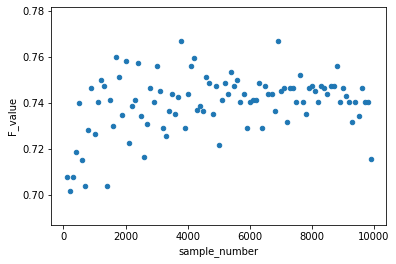

In [36]:
pd.DataFrame(list_f_val, columns=['sample_number', 'F_value']).plot(kind='scatter', x='sample_number', y='F_value')

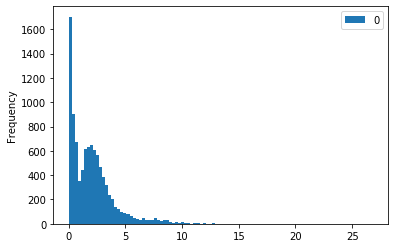

In [37]:
## Generate distance matrix
dist_M = distance.cdist(list_samples[98][0], X_train1, metric='euclidean')

## Distribution of minimum distances
pd.DataFrame(np.min(dist_M, axis=1)).plot(kind='hist', bins=100)

In [38]:
## Even minimum of minimum is not 0
np.min(dist_M, axis=1).min()

0.0010119365803578433

## 3. Compare SMOTE

In [39]:
## Instanciation of SMOTE
sm = SMOTE(random_state=0)

In [40]:
X_res, y_res = sm.fit_resample(X_train1, y_train)

In [41]:
X_res.shape

(762, 10)

In [42]:
clf4 = LogisticRegression()
clf4.fit(X_res, y_res)

f1_score(y_test, clf4.predict(X_test1))

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7333333333333333